In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy import stats as st
import numpy as np
import heapq
from matplotlib.patches import Rectangle

In [2]:
def load_processed(filename):
    A = 0
    B = 0
    w = []
    with open(filename) as f:
        A, B = [float(t) for t in f.readline().split()]
        for line in f.readlines():
            w.append(float(line))
    return A, B, w

A1, B1, w1 = load_processed('data/Ch1.txt')
A2, B2, w2 = load_processed('data/Ch2.txt')

data1 = pd.read_csv('data/Ch1_800nm_0.03.csv', sep=';', encoding='cp1251')
data2 = pd.read_csv('data/Ch2_800nm_0.03.csv', sep=';', encoding='cp1251')

data1 = data1['ls']
data2 = data2['la']

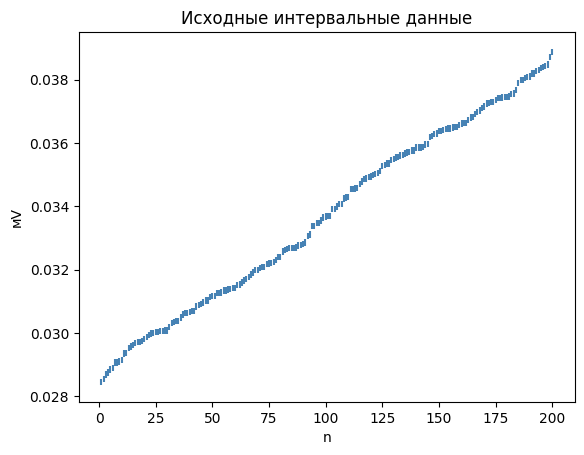

In [3]:
eps = 1e-4

plt.vlines(data1.index + 1, data1 - eps, data1 + eps, color = "steelblue")
plt.xlabel('n')
plt.ylabel('мV')
plt.title('Исходные интервальные данные')
plt.show()

In [4]:
data1_fixed = [y - (i + 1) * B1 for i, y in enumerate(data1)]
data2_fixed = [y - (i + 1) * B2 for i, y in enumerate(data2)]
data1_fixed_int = [[y - w1[i]*eps, y + w1[i]*eps] for i, y in enumerate(data1_fixed)]
data2_fixed_int = [[y - w2[i]*eps, y + w2[i]*eps] for i, y in enumerate(data2_fixed)]

data1_with_error = []
for i in range (data1.size):
    data1_with_error.append(data1[i] - eps)
    data1_with_error.append(data1[i] + eps)

ints_list1 = list(set(data1_with_error))
ints_list1.sort()
ints_list1 = np.array([[ints_list1[i], ints_list1[i+1]] for i in range(len(ints_list1) - 1)])

data1_with_error = np.array(data1_with_error).reshape(len(data1_with_error)//2, 2)

mode_list = []
for i in range (len(ints_list1)):
    count = 0
    for j in range (data1_with_error.shape[0]):
#        if(set(data1_with_error[j]).issubset(set(ints_list1[i]))): 
        if(data1_with_error[j][0] <= ints_list1[i][0] and data1_with_error[j][1] >= ints_list1[i][1]): 
            count += 1
    mode_list.append(count)
    
max_mode=heapq.nlargest(3, range(len(mode_list)), mode_list.__getitem__)
print(max_mode)
print(len(mode_list))

[301, 307, 343]
387


In [5]:
mode_list = np.array(mode_list)
begin, end = 0, len(mode_list) - 1
while begin != end and end != begin + 1 :
    if (np.sum(mode_list[0:(begin+end) // 2 - 1]) < np.sum(mode_list[(begin+end) // 2 + 1: len(mode_list)])):
        begin = (begin+end) // 2
    else:
        end = (begin+end) // 2

median = ints_list1[(begin+end) // 2 + 1]
print(median)

[0.03418  0.034183]


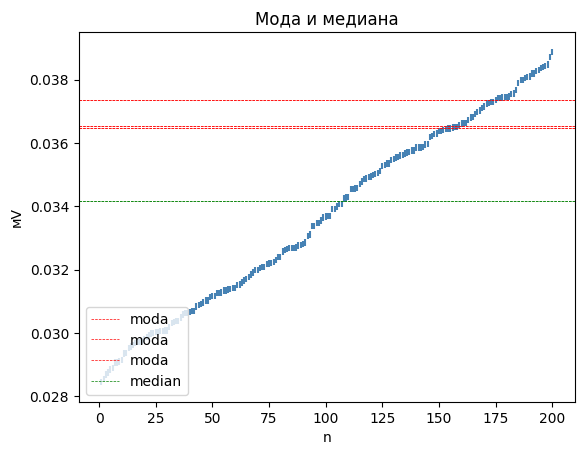

In [6]:

ints_list1_med = [(ints[0] + ints[1]) / 2 for ints in ints_list1]

plt.vlines(data1.index + 1, data1 - eps, data1 + eps, color = "steelblue")
for i in max_mode:
    plt.axhline(y=ints_list1[i][0], color='r', linestyle='--', linewidth = 0.5, label='moda')
    plt.axhline(y=ints_list1[i][1], color='r', linestyle='--', linewidth = 0.5)

plt.axhline(y=median[0], color='g', linestyle='--', linewidth = 0.5, label='median')
plt.axhline(y=median[1], color='g', linestyle='--', linewidth = 0.5)
plt.title('Мода и медиана')
plt.xlabel('n')
plt.ylabel('мV')
plt.legend()
plt.show()

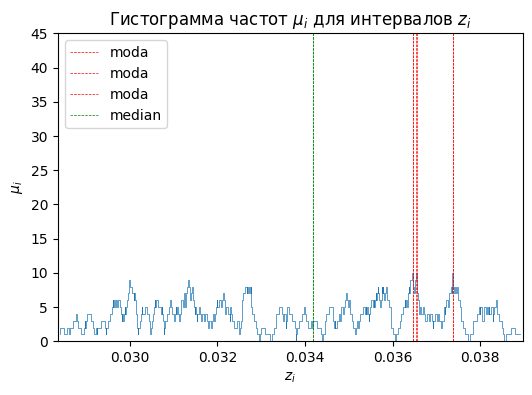

In [7]:
plt.figure(figsize=(6, 4))
plt.xlim([ints_list1[0][0], ints_list1[len(ints_list1) - 1][1]])
plt.ylim([0, 45])
plt.step(ints_list1_med, mode_list,lw=0.5)
for i in max_mode:
    plt.axvline(ints_list1[i][0], color='r', linestyle='--', linewidth = 0.5, label='moda')
    plt.axvline(ints_list1[i][1], color='r', linestyle='--', linewidth = 0.5)

plt.axvline(median[0], color='g', linestyle='--', linewidth = 0.5, label='median')
plt.axvline(median[1], color='g', linestyle='--', linewidth = 0.5)
plt.legend()
plt.title('Гистограмма частот $\mu_{i}$ для интервалов $z_{i}$')
plt.xlabel('$z_{i}$')
plt.ylabel('$\mu_{i}$')
plt.legend()
plt.show()